<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/Pima_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pima Indian Diabetes Study

---


### ***Solution Statement***: "Use the Machine Learning Workflow to process and transform Pima Indian Diabetes data to create a prediction model. This model must predict which people are likely to develop diabetes with 70% or greater accuracy."
* Understand the features in data
* Identify critical features
* Focus on at risk population
* Select data source

### Solution Creation


---


#### Machine Learning Workflow
*   Process Pima Indian Data
*   Transform data as required



### Preparing the Data
####**Tidy Data**

> Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:

*   Each **variable** is a **column**
*   Each **observation** is a **row**
*   Each type of **observational unit** is a **table**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/pima-data.csv') # load the dataset

In [3]:
df.shape

(768, 10)

In [4]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Eliminate columns

*   Not used
*   No values
*   Duplicates or Correlated columns

In [6]:
# check for null values
df.isnull().values.any()

False

In [7]:
# locate any correlated columns
def plot_corr(df, size=11):
  """
  Function plots a graphical correlation matrix for each pair of columns in the dataframe.

  Input:
    df: pandas DataFrame
    size: vertical and horizontal size of the plot

  Displays:
    matrix of correlation between colunns Blue-cyan-yellow-red-darkred =? less to mroe correlated
                                          0 ------------------> 1
                                          Expect a darkred line running from top left to bottom right
  """

  corr = df.corr() # data frame correlation function
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr) # color code the rectangles by correlation value
  plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
  plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

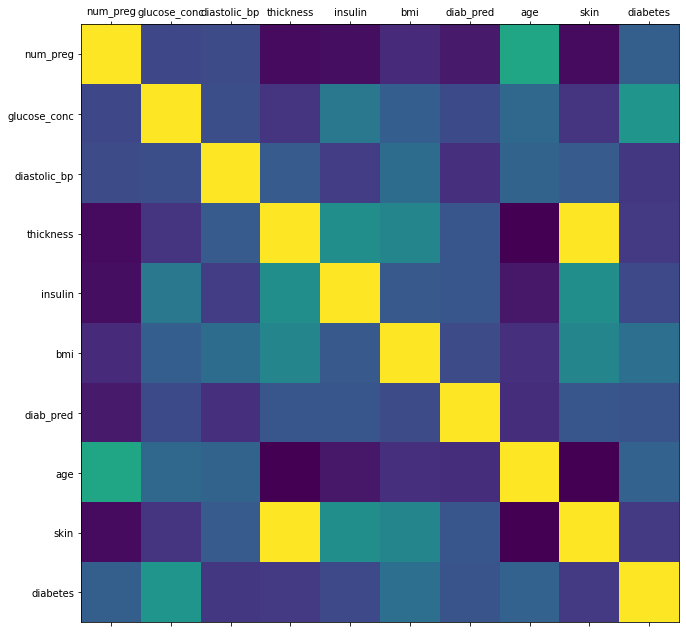

In [8]:
plot_corr(df) # correlation value is yellow instead of red 
# skin and thickness look to be highly correlated

In [9]:
df.corr() # this also shows a 1.0 correlation between skin and thickness

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head() # it's difficult to see the correlation between the thickness and skin columns just by looking at the data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
# drop the skin column
del df['skin']

In [12]:
df.head() # skin column is gone

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


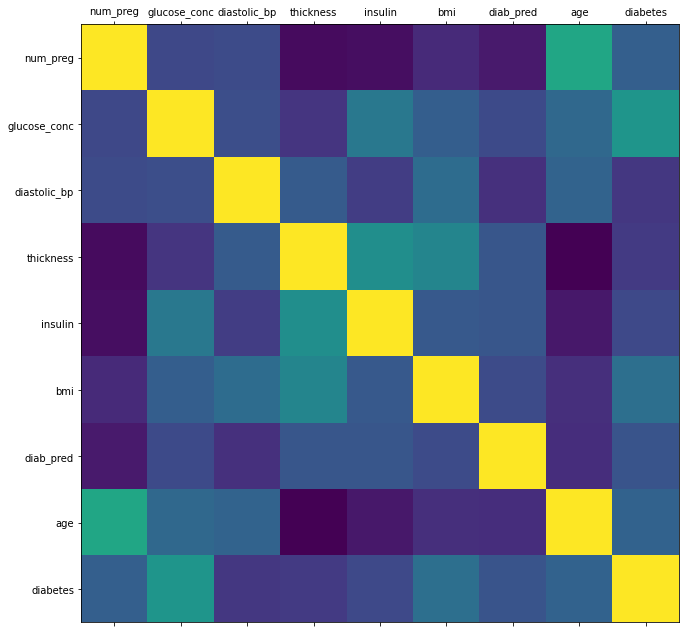

In [13]:
plot_corr(df)

### Check data types

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [15]:
# Change True to 1, False to 0
diabetes_map = {True: 1, False: 0} # create dictionary to map values

In [16]:
df['diabetes'] = df['diabetes'].map(diabetes_map) # change the values in the dataframe

In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check the true/false ratio

In [18]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print("number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) * 100))
print("number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) * 100))

number of True cases: 268 (34.90%)
number of False cases: 500 (65.10%)


Check class distribution

In [19]:
num_obs = len(df) # number of observations
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


### Splitting the data
70% for training, 30% for testing

In [20]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age'] # feature columns
predicted_class_names = ['diabetes'] # predicted column

# split the data
X = df[feature_col_names].values # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false, column (1 X m))
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


In [21]:
# check to see if we have 70/30 split
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

In [22]:
print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]),  (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]),  (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]),  (len(y_train[y_train[:] == 1])/len(y_train)) * 100.0))
print("Training False: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]),  (len(y_train[y_train[:] == 0])/len(y_train)) * 100.0))
print("")
print("Test True: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]),  (len(y_test[y_test[:] == 1])/len(y_test)) * 100.0))
print("Test False: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]),  (len(y_test[y_test[:] == 0])/len(y_test)) * 100.0))


Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Test True: 80 (34.63%)
Test False: 151 (65.37%)


#### Post-split Data Preparation

Hidden Missing Values

In [23]:
df.head() # we can see a thickness of 0 in row 3, a skin thickness of 0 is not possible, so this is a hidden missing value

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Check for other potential missing values

In [24]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

In [25]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean") # SimpleImputer does not use axis=0

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### Training Initial Algorithm- Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

# create Guassian Naive Bayes model object and train the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

#### Performance on Training Data

In [27]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



#### Performance on Testing Data

In [28]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



#### Metrics

In [29]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Confusion Matrix: 
                      TN FP
                      FN TP

- Precision = TP/(TP + FP) 
- Recall = TP/ (TP + FN)

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

Predict Training Data

In [31]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.000000


Predict Test Data

In [32]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print("Accuracy: {0:4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.740260


In [33]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Setting regularization parameter

1st max value of 0.613 occured at C=1.300


Text(0, 0.5, 'recall score')

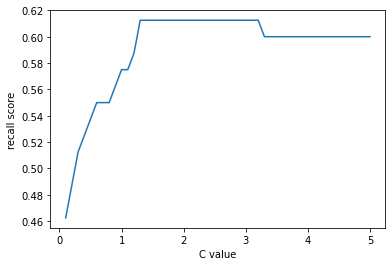

In [39]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, solver='liblinear', random_state=42) # w/out solver='liblinear', this throws a bunch of warnings
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")


#### Logistic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

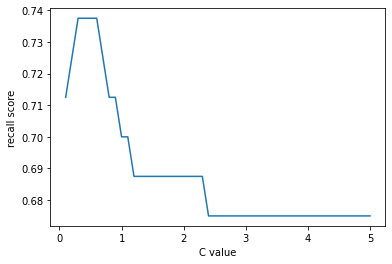

In [42]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0; 
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", solver='liblinear', random_state=42) # w/out solver='liblinear', this throws a bunch of warnings
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [44]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


#### Logistics Regression with Cross Validation

In [45]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

#### Predict on Test Data

In [46]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7143
[[110  41]
 [ 25  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231

